In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [9]:
df=pd.read_csv('data_final .csv')

In [10]:
correlation = df.corr()
target_correlation = correlation['Price']
target_correlation

Price            1.000000
Area             0.619150
Bedrooms         0.638388
WC               0.634235
Length           0.353590
Width            0.228860
Floors           0.405474
has_facade       0.069307
no_facade       -0.069113
Area_Total       0.685507
Average_price    0.383768
Name: Price, dtype: float64

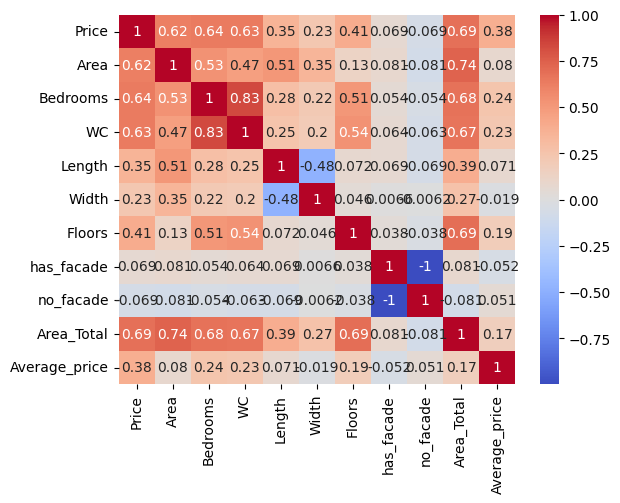

In [11]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
#Loại bỏ 2 biến có độ tương quan với biến Price thấp
df = df.drop(['has_facade','no_facade'],axis=1)

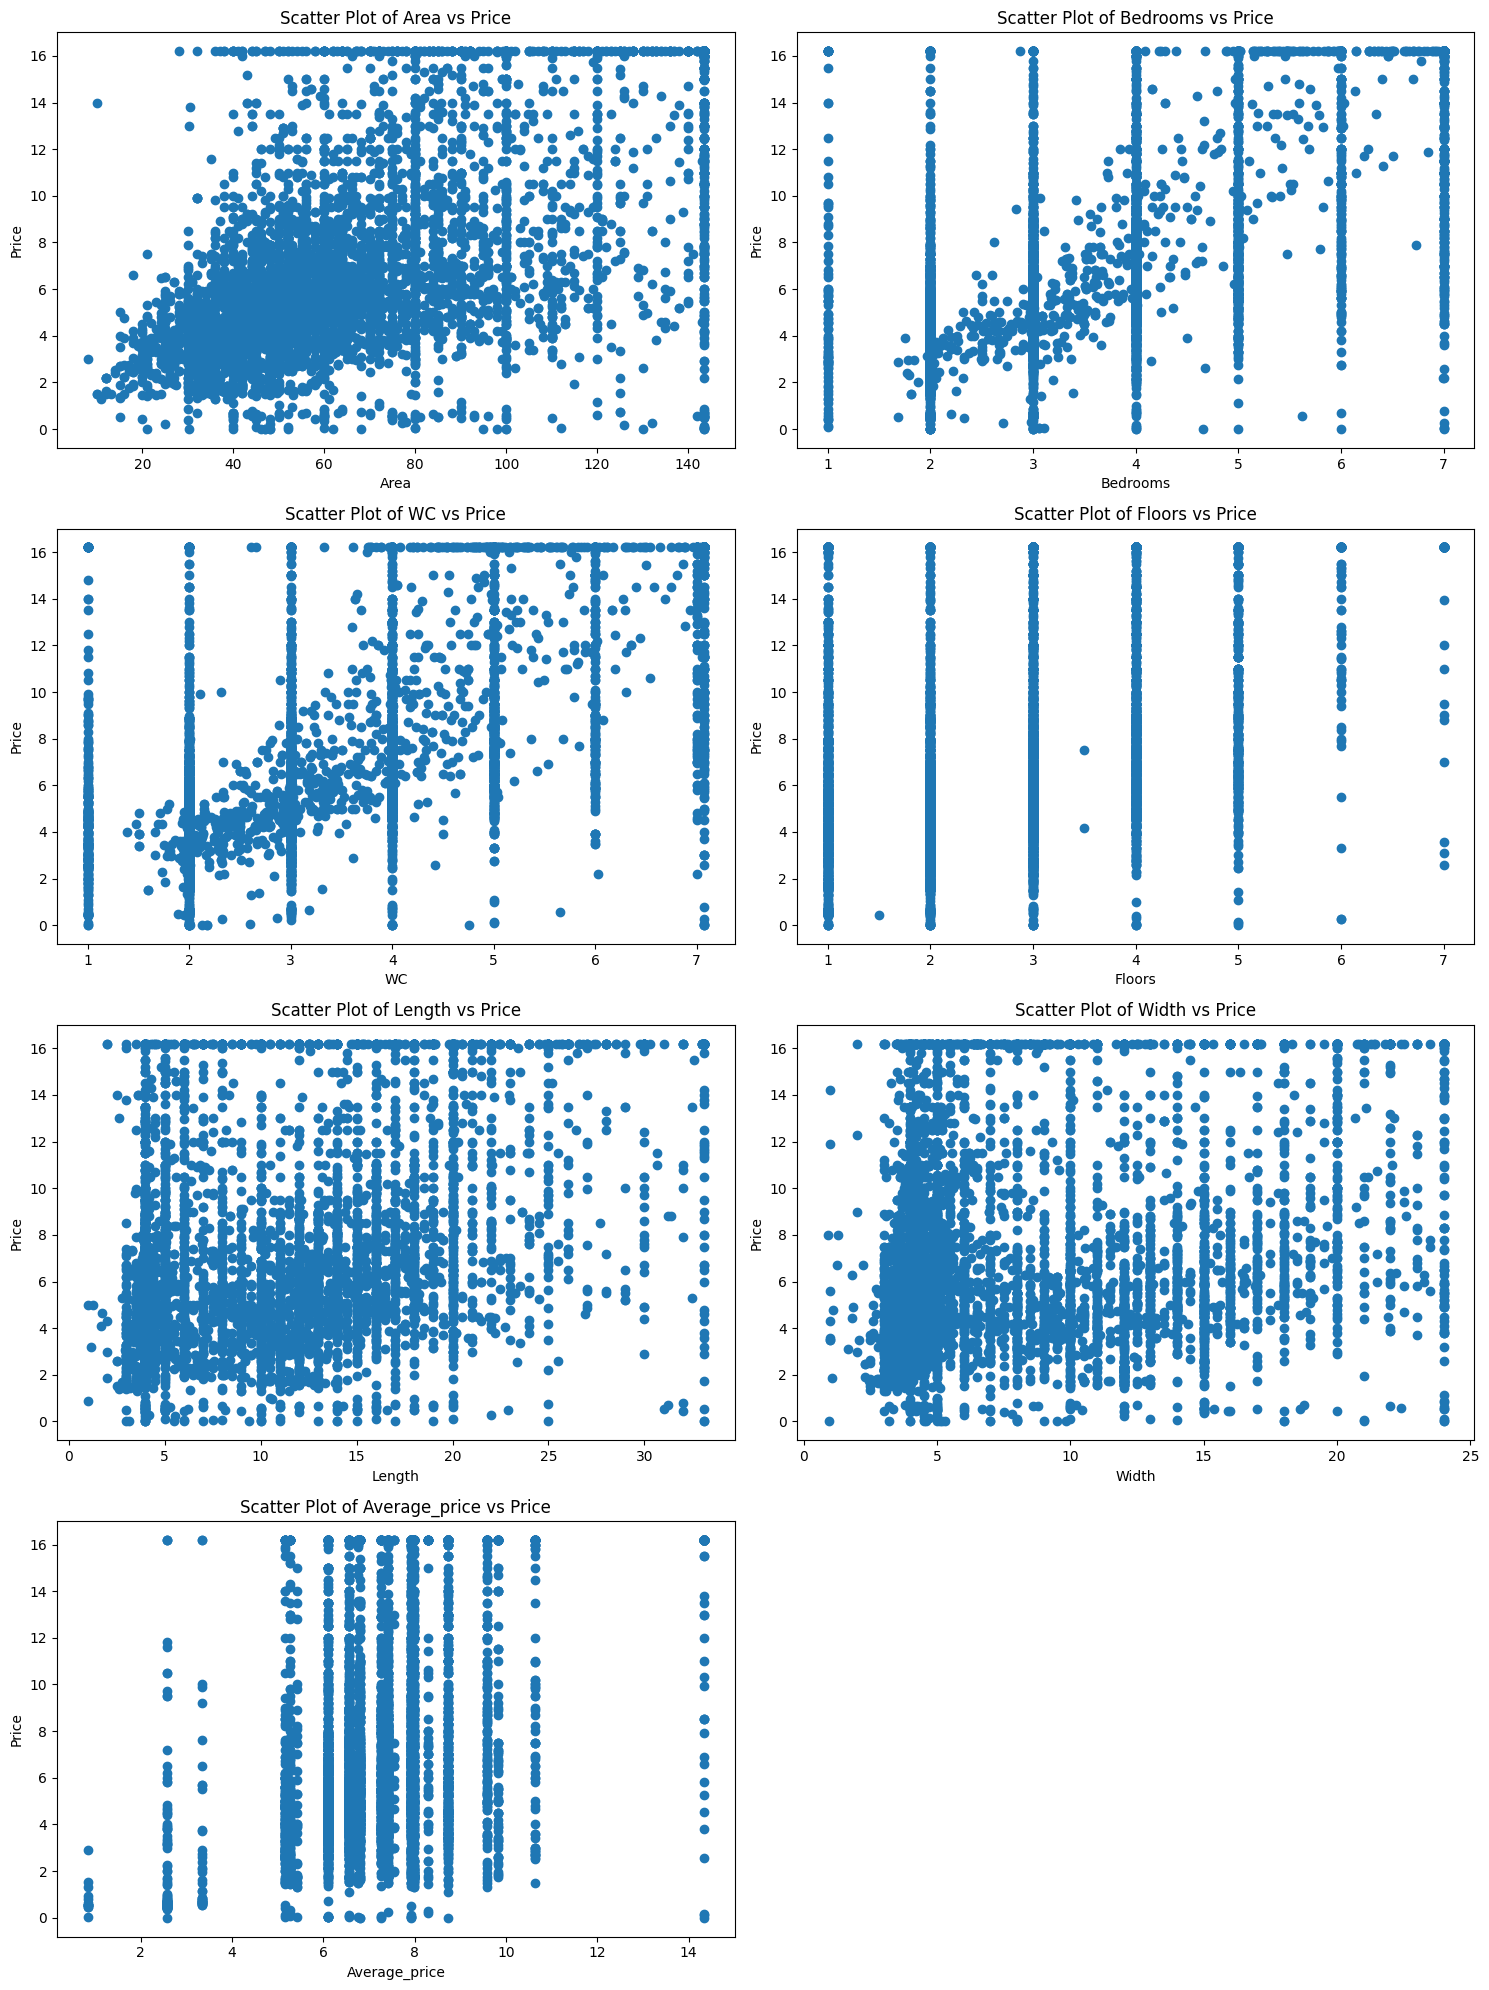

In [13]:

features = ['Area', 'Bedrooms', 'WC', 'Floors', 'Length', 'Width', 'Average_price', 'Area_Total']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['Price'])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'Scatter Plot of {feature} vs Price')

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Base model:Linear Regression

In [14]:
#Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = data_scaled.drop(['Price'], axis=1)
y = data_scaled['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lin_reg = LinearRegression()#Tạo mô hình Linear Regression
lin_reg.fit (X_train, y_train)#Train mô hình

LinearRegression()

In [17]:
from sklearn import metrics
#Đánh giá mô hình


y_pred = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE_test = metrics.mean_squared_error(y_test,y_pred)
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)

RMSE = np.sqrt(MSE_test)
R2 = r2_score(y_test, y_pred)

pd.DataFrame([MAE,MSE_test,MSE_train,RMSE,R2],index=['MAE', 'MSE_test','MSE_train', 'RMSE','R2'], columns=['Metrics'])

,Metrics
MAE,0.424267
MSE_test,0.358861
MSE_train,0.378046
RMSE,0.599050
R2,0.641209


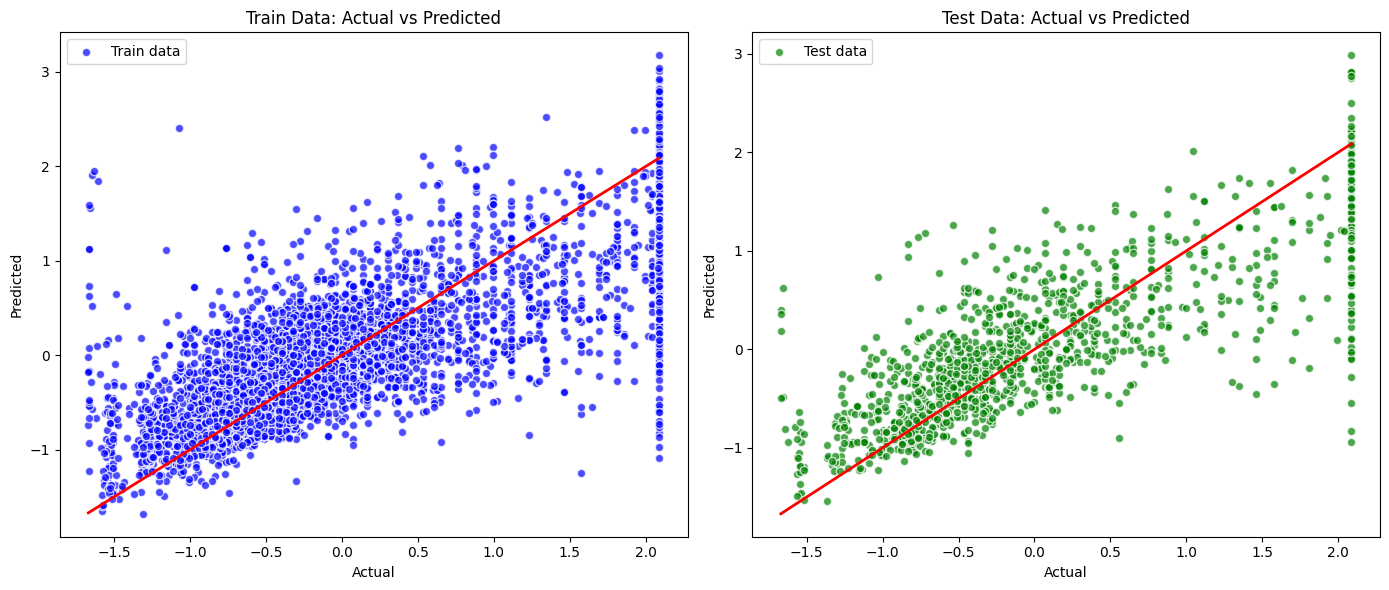

In [19]:
# Plotting
plt.figure(figsize=(14, 6))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', edgecolor='w', alpha=0.7, label='Train data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Data: Actual vs Predicted')
plt.legend()

# Testing data plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green', edgecolor='w', alpha=0.7, label='Test data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

**Training Data: Actual vs Predicted**

---Phân bố dữ liệu:



Các điểm dữ liệu phân bố xung quanh đường y = x (đường màu đỏ), nhưng có sự phân tán khá lớn, đặc biệt là ở các giá trị lớn của biến thực tế.
Điều này cho thấy mô hình Linear Regression có thể dự đoán tốt hơn ở các giá trị trung bình nhưng gặp khó khăn với các giá trị cực trị.


---Độ chính xác:



Mô hình Linear Regression không hoàn toàn chính xác với dữ liệu huấn luyện, tuy nhiên, vẫn có một xu hướng dự đoán hợp lý.
Có nhiều điểm nằm xa đường y = x, đặc biệt ở các giá trị lớn.

**Testing Data: Actual vs Predicted**


---Phân bố dữ liệu
Các điểm dữ liệu cũng phân bố xung quanh đường y = x, nhưng sự phân tán dữ liệu rộng hơn so với dữ liệu huấn luyện, cho thấy mô hình có thể gặp khó khăn trong việc tổng quát hóa khi áp dụng vào dữ liệu kiểm tra.
Độ phân tán rộng đặc biệt rõ rệt ở các giá trị cực trị, cho thấy mô hình có thể không tốt trong việc dự đoán các giá trị này.


---Độ chính xác



Hiệu suất của mô hình Linear Regression trên dữ liệu kiểm tra không tốt bằng dữ liệu huấn luyện, với nhiều điểm dự đoán nằm xa giá trị thực tế hơn.
Điều này có thể phản ánh sự đơn giản của mô hình Linear Regression khi không thể nắm bắt hết các mối quan hệ phức tạp trong dữ liệu.



Hiệu suất trên dữ liệu huấn luyện: Mô hình Linear Regression có xu hướng dự đoán khá tốt ở mức trung bình, nhưng gặp khó khăn với các giá trị cực trị và có nhiều điểm dữ liệu nằm xa giá trị thực tế.

Hiệu suất trên dữ liệu kiểm tra: Hiệu suất của mô hình trên dữ liệu kiểm tra kém hơn so với dữ liệu huấn luyện, với sự phân tán dữ liệu rộng và nhiều điểm dự đoán nằm xa giá trị thực tế.

In [20]:
#Mô hình có MSE_train > MSE_test, mô hình không bị overfitting

In [21]:
#Kiểm tra lại  bằng cách sử dụng cross validation
from sklearn.model_selection import cross_val_score


lr = LinearRegression()

# Perform 5-fold cross validation
scores = cross_val_score(lr, X, y, cv=5)

print("Cross-validated scores:", scores)
print("Mean CV R2:", np.mean(scores))

Cross-validated scores: [0.57902569 0.5400317  0.64094078 0.61112641 0.63204595]
Mean CV R2: 0.6006341079531783


In [22]:
#Giá trị R2 của mô hình không thay đổi nhiều khi sử dụng cross validation
#và các giá trị R2 không có sự chênh lệch lớn, mô hình không bị overfitting

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X, y)

coefficients = pd.Series(lr.coef_, index=X.columns)
print("Coefficients:")
print(coefficients.sort_values(ascending=False))

Coefficients:
Average_price    0.252397
Area_Total       0.222250
WC               0.198793
Area             0.173388
Length           0.137999
Width            0.119969
Bedrooms         0.099791
Floors           0.008629
dtype: float64


#GradientBoostingRegressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
y_pred_train = gbr.predict(X_train)

MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE_test = metrics.mean_squared_error(y_test,y_pred)
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)

RMSE = np.sqrt(MSE_test)
R2 = r2_score(y_test, y_pred)

pd.DataFrame([MAE,MSE_test,MSE_train,RMSE,R2],index=['MAE', 'MSE_test','MSE_train', 'RMSE','R2'], columns=['Metrics'])

,Metrics
MAE,0.391177
MSE_test,0.321590
MSE_train,0.276060
RMSE,0.567089
R2,0.678473


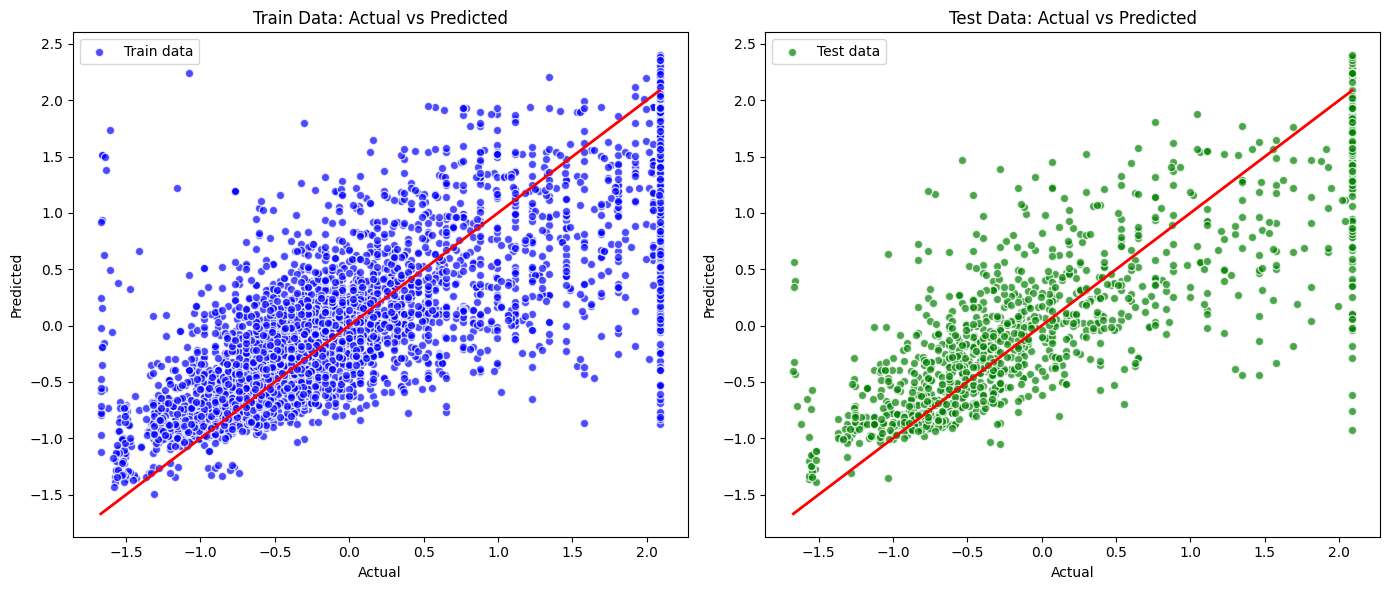

In [35]:
# Plotting
plt.figure(figsize=(14, 6))

# Training data plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', edgecolor='w', alpha=0.7, label='Train data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Data: Actual vs Predicted')
plt.legend()

# Testing data plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green', edgecolor='w', alpha=0.7, label='Test data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

Training Data: Actual vs Predicted:


---Phân bố dữ liệu:



Các điểm dữ liệu phân bố khá sát xung quanh đường y = x (đường màu đỏ), cho thấy mô hình GradientBoostingRegressor dự đoán tốt trên dữ liệu huấn luyện.
Sự phân tán của các điểm dữ liệu ít hơn so với mô hình Linear Regression, đặc biệt ở các giá trị trung bình và lớn.


---Độ chính xác:



Mô hình GradientBoostingRegressor có độ chính xác cao hơn trên dữ liệu huấn luyện, với nhiều điểm dữ liệu nằm gần đường y = x.
Tuy nhiên, vẫn có một số điểm nằm xa đường này, đặc biệt là ở các giá trị cực trị, nhưng sự phân tán ít hơn so với mô hình Linear Regression.

Testing Data: Actual vs Predicted:


---Phân bố dữ liệu:



Các điểm dữ liệu phân bố xung quanh đường y = x, nhưng có sự phân tán rộng hơn so với dữ liệu huấn luyện, tương tự như mô hình Linear Regression.
Dù vậy, sự phân tán vẫn ít hơn so với mô hình Linear Regression trên dữ liệu kiểm tra, cho thấy mô hình GradientBoostingRegressor tổng quát hóa tốt hơn.


---Độ chính xác:



Hiệu suất của mô hình GradientBoostingRegressor trên dữ liệu kiểm tra tốt hơn so với mô hình Linear Regression, với nhiều điểm dữ liệu nằm gần đường y = x hơn.
Mặc dù còn một số điểm nằm xa giá trị dự đoán, đặc biệt ở các giá trị cực trị, nhưng tổng thể độ phân tán ít hơn so với mô hình Linear Regression.

**Kết luận**

Hiệu suất trên dữ liệu huấn luyện: Mô hình GradientBoostingRegressor dự đoán tốt hơn so với mô hình Linear Regression, với nhiều điểm dữ liệu nằm gần giá trị thực tế hơn và sự phân tán ít hơn.

Hiệu suất trên dữ liệu kiểm tra: Mô hình GradientBoostingRegressor cũng tổng quát hóa tốt hơn trên dữ liệu kiểm tra, với độ chính xác cao hơn và ít phân tán hơn so với mô hình Linear Regression.

In [25]:
#Mô hình có MSE_train < MSE_test.Nhưng chênh lệch giữa MSE_train và MSE_test không lớn, mô hình có thể không bị overfitting

In [26]:
from sklearn.model_selection import cross_val_score
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

scores = cross_val_score(gbr, X, y, cv=5)

print("Cross-validated scores:", scores)
print("Mean CV R2:", np.mean(scores))

Cross-validated scores: [0.5674179  0.54655363 0.59887217 0.61326591 0.56328712]
Mean CV R2: 0.5778793484717214


In [27]:
#Giá trị R2 của mô hình có sự thay đổi nhiều khi sử dụng cross validation
#và các giá trị R2 không chênh lệch lớn
#Mô hình có thể  bị overfitting hay không ????

In [28]:
#Sử dụng GridSearchCV để tìm ra các tham số tốt nhất cho mô hình

In [29]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor

# # Khởi tạo mô hình
# gbr = GradientBoostingRegressor(random_state=42)

# # Định nghĩa lưới tham số để tìm kiếm
# param_grid = {
#     'n_estimators': [10,50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [2,3, 4, 5],
#     'min_samples_split': [2, 4],
#     'min_samples_leaf': [1, 2],
#     'max_features': [None, 'sqrt', 'log2']
# }

# # Khởi tạo GridSearchCV
# grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')

# # Thực hiện tìm kiếm tham số
# grid_search.fit(X_train, y_train)

# # In ra tham số tốt nhất
# print(grid_search.best_params_)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(
    n_estimators=70,     # Số lượng cây quyết định tối đa
    learning_rate=0.1,   # Tốc độ học
    max_depth=2,         # Độ sâu tối đa của cây quyết định
    min_samples_split=3, # Số lượng mẫu tối thiểu cần thiết để chia một nút nội bộ
    min_samples_leaf=1,  # Số lượng mẫu tối thiểu cần thiết ở mỗi nút lá
    max_features=None,   # Số lượng đặc trưng tối đa được sử dụng cho mỗi cây
    random_state=42      # Seed cho bộ sinh số ngẫu nhiên, giúp đảm bảo tính tái tạo của kết quả
)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
y_pred_train = gbr.predict(X_train)

MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE_test = metrics.mean_squared_error(y_test,y_pred)
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)

RMSE = np.sqrt(MSE_test)
R2 = r2_score(y_test, y_pred)

pd.DataFrame([MAE,MSE_test,MSE_train,RMSE,R2],index=['MAE', 'MSE_test','MSE_train', 'RMSE','R2'], columns=['Metrics'])

,Metrics
MAE,0.411257
MSE_test,0.340024
MSE_train,0.330383
RMSE,0.583115
R2,0.660043


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Khởi tạo và fit mô hình
gbr = GradientBoostingRegressor(
    n_estimators=70,     # Số lượng cây quyết định tối đa
    learning_rate=0.1,   # Tốc độ học
    max_depth=2,         # Độ sâu tối đa của cây quyết định
    min_samples_split=3, # Số lượng mẫu tối thiểu cần thiết để chia một nút nội bộ
    min_samples_leaf=1,  # Số lượng mẫu tối thiểu cần thiết ở mỗi nút lá
    max_features=None,   # Số lượng đặc trưng tối đa được sử dụng cho mỗi cây
    random_state=42      # Seed cho bộ sinh số ngẫu nhiên, giúp đảm bảo tính tái tạo của kết quả
)
gbr.fit(X, y)

# Lấy feature importance từ mô hình
importances = gbr.feature_importances_

# Tạo một Series pandas với feature importance
importances_series = pd.Series(importances, index=X.columns)

# In ra feature importance
print("Feature importances:")
print(importances_series.sort_values(ascending=False))

Feature importances:
Area_Total       0.372044
WC               0.187252
Area             0.165237
Bedrooms         0.135734
Average_price    0.123319
Width            0.009459
Length           0.006473
Floors           0.000481
dtype: float64


In [32]:
#Mô hình có MSE_train < MSE_test.Nhưng chênh lệch giữa MSE_train và MSE_test đã rất nhỏ, mô hình không bị overfitting

Deep learning

In [33]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
import pandas as pd

class HousePriceDataset(Dataset):
    '''
    Prepare the house price dataset for regression
    '''

    def __init__(self, dataframe, scale_data=True):
        # Load data from DataFrame
        df = dataframe
        X = df.drop(columns=['Price']).values  # Assuming 'Price' is the column name for y
        y = df['Price'].values.reshape(-1, 1)

        # Apply scaling if necessary
        if scale_data:
            X = StandardScaler().fit_transform(X)

        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


class MLP(nn.Module):
    '''
    Multilayer Perceptron for regression.
    '''

    def __init__(self, input_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 128),  # Increase to 128 neurons
            nn.ReLU(),
            nn.Linear(128, 64),  # Another hidden layer with 64 neurons
            nn.ReLU(),
            nn.Linear(64, 32),  # Additional layer
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        '''
        Forward pass
        '''
        return self.layers(x)


if __name__ == '__main__':

    # Set fixed random number seed
    torch.manual_seed(42)

    # Assuming df is already defined and preprocessed
    # df = your_preprocessed_dataframe

    # Prepare Boston dataset
    dataset = HousePriceDataset(df)
    input_size = dataset.X.shape[1]  # Get the number of features in the dataset
    trainloader = DataLoader(dataset, batch_size=10, shuffle=True, num_workers=0)

    # Initialize the MLP with the correct input size
    mlp = MLP(input_size)

    # Define the loss function and optimizer
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3)

    # Run the training loop
    for epoch in range(20):  # 20 epochs

        # Print epoch
        print(f'Starting epoch {epoch + 1}')

        # Set current loss value
        current_loss = 0.0

        # Iterate over the DataLoader for training data
        for i, data in enumerate(trainloader, 0):

            # Get and prepare inputs
            inputs, targets = data
            inputs, targets = inputs.float(), targets.float()

            # Zero the gradients
            optimizer.zero_grad()

            # Perform forward pass
            outputs = mlp(inputs)

            # Compute loss
            loss = loss_function(outputs, targets)

            # Perform backward pass
            loss.backward()

            # Perform optimization
            optimizer.step()

            # Print statistics
            current_loss += loss.item()
            if i % 10 == 0:
                print('Loss after mini-batch %5d: %.3f' %
                      (i + 1, current_loss / 500))
                current_loss = 0.0

    # Process is complete.
    print('Training process has finished.')

    # Evaluation
    def calculate_r_squared(y_true, y_pred):
        # Convert tensors to numpy arrays if they are tensors
        if torch.is_tensor(y_true):
            y_true = y_true.detach().numpy()
        if torch.is_tensor(y_pred):
            y_pred = y_pred.detach().numpy()

        # Mean of true values
        mean_true = np.mean(y_true)

        # Calculate total sum of squares
        ss_total = np.sum((y_true - mean_true)**2)

        # Calculate residual sum of squares
        ss_res = np.sum((y_true - y_pred)**2)

        # Calculate R-squared
        r_squared = 1 - (ss_res / ss_total)

        return r_squared

    # Set model to evaluation mode
    mlp.eval()

    # List to store predictions and true values
    predictions = []
    true_values = []

    # Iterate over the DataLoader for evaluation
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs = inputs.float()

        # Perform forward pass
        outputs = mlp(inputs)

        # Append predictions and true values
        predictions.append(outputs)
        true_values.append(targets)

    # Concatenate all predictions and true values
    predictions = torch.cat(predictions).squeeze()
    true_values = torch.cat(true_values).squeeze()

    # Calculate R-squared
    r2 = calculate_r_squared(true_values, predictions)

    print(f'R-squared on training data: {r2:.4f}')

Starting epoch 1
Loss after mini-batch     1: 0.202
Loss after mini-batch    11: 1.358
Loss after mini-batch    21: 1.220
Loss after mini-batch    31: 1.054
Loss after mini-batch    41: 0.590
Loss after mini-batch    51: 0.237
Loss after mini-batch    61: 0.309
Loss after mini-batch    71: 0.178
Loss after mini-batch    81: 0.229
Loss after mini-batch    91: 0.211
Loss after mini-batch   101: 0.129
Loss after mini-batch   111: 0.205
Loss after mini-batch   121: 0.152
Loss after mini-batch   131: 0.165
Loss after mini-batch   141: 0.214
Loss after mini-batch   151: 0.306
Loss after mini-batch   161: 0.222
Loss after mini-batch   171: 0.168
Loss after mini-batch   181: 0.199
Loss after mini-batch   191: 0.135
Loss after mini-batch   201: 0.164
Loss after mini-batch   211: 0.140
Loss after mini-batch   221: 0.183
Loss after mini-batch   231: 0.204
Loss after mini-batch   241: 0.167
Loss after mini-batch   251: 0.199
Loss after mini-batch   261: 0.216
Loss after mini-batch   271: 0.196
Los

<h4> Em có sử dụng  Multilayer Perceptron (MLP) với 1 tầng layer input , 1 tầng layer output và 6 tầng hidden layer. Trong đó có class HousePrice nhằm chuẩn bị dữ liệu giá nhà cho mô hình hồi quy bằng cách nạp dữ liệu từ một DataFrame, chuẩn hóa dữ liệu nếu cần thiết, và chuyển đổi dữ liệu thành tensor để sử dụng với PyTorch.Trong đấy